In [1]:
import imageio
import matplotlib.pyplot as plt

from os import listdir
import os.path

import numpy as np

In [2]:
image_size = 55  # this is the size of each tile (cause the whole image is 825 x 825 and consists of 15 x 15 tiles)

In [3]:
base_dir = '/scratch/jurkat_ifc/Step2_input_tiled_tifs/'
class_dirs = [directory for directory in listdir(base_dir) if os.path.isdir(os.path.join(base_dir, directory))]
class_dirs.sort()

patches_base_dir = '/scratch/jurkat_ifc/ch3'

In [4]:
class_dirs

['Anaphase', 'G1', 'G2', 'Metaphase', 'Prophase', 'S', 'Telophase']

In [5]:
all_files = []
for directory in class_dirs:
    all_files.extend([os.path.join(base_dir, directory, file) for file in listdir(os.path.join(base_dir, directory)) if os.path.isfile(os.path.join(base_dir, directory, file))])
all_files.sort()

In [ ]:
for filepath in all_files:
    image = imageio.imread(filepath)
    print(filepath.split(os.path.sep)[-2:])
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap='gray')
    plt.show()
    for j in range(image.shape[1] // image_size):
        for i in range(image.shape[0] // image_size):
            plt.imshow(image[i * image_size: (i+1) * image_size, j * image_size: (j+1) * image_size], cmap="gray")
            plt.show()

In [6]:
# examples of .tif images and tiled Jurkat cell images within them (for all 3 "channels")

(825, 825)


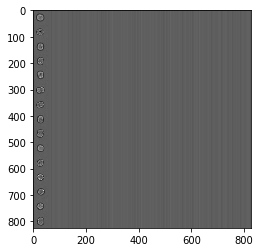

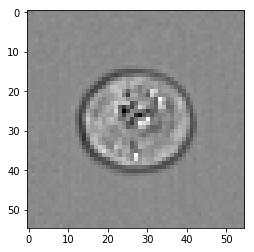

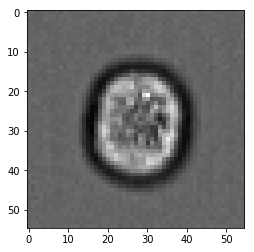

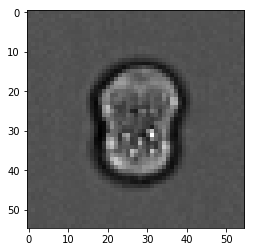

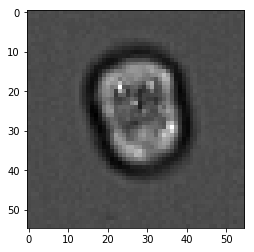

In [7]:
temp_image_ch3 = imageio.imread("/scratch/jurkat_ifc/Step2_input_tiled_tifs/Anaphase/Ch3_CP0001.tif")
print(temp_image_ch3.shape)
plt.imshow(temp_image_ch3, cmap='gray')
plt.show()

for y in range(1):
    for x in range(1,5):
        plt.imshow(temp_image_ch3[x * image_size: (x+1) * image_size, y * image_size: (y+1) * image_size], cmap="gray")
        plt.show()

(825, 825)


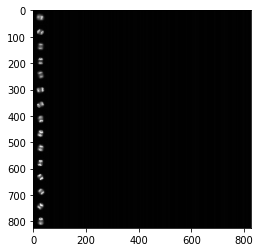

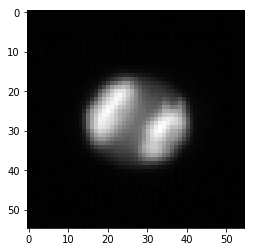

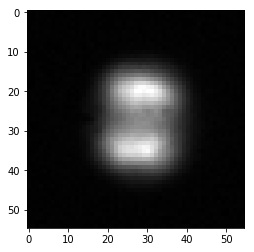

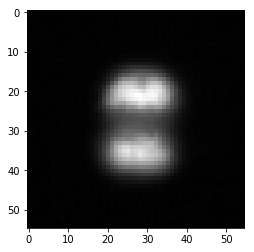

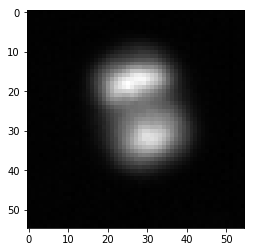

In [8]:
temp_image_ch4 = imageio.imread("/scratch/jurkat_ifc/Step2_input_tiled_tifs/Anaphase/Ch4_CP0001.tif")
print(temp_image_ch4.shape)
plt.imshow(temp_image_ch4, cmap='gray')
plt.show()

for y in range(1):
    for x in range(1,5):
        plt.imshow(temp_image_ch4[x * image_size: (x+1) * image_size, y * image_size: (y+1) * image_size], cmap="gray")
        plt.show()

(825, 825)


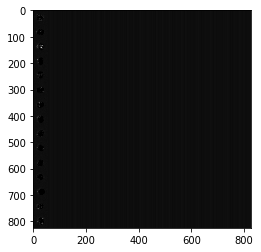

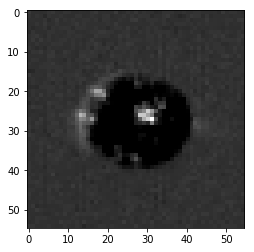

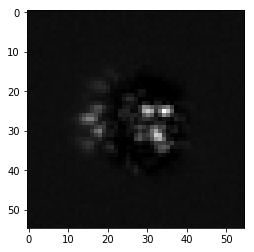

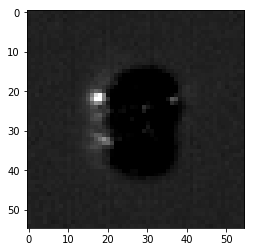

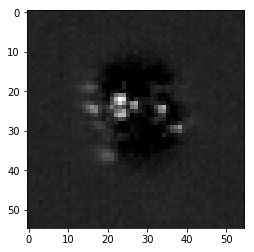

In [9]:
temp_image_ch6 = imageio.imread("/scratch/jurkat_ifc/Step2_input_tiled_tifs/Anaphase/Ch6_CP0001.tif")
print(temp_image_ch6.shape)
plt.imshow(temp_image_ch6, cmap='gray')
plt.show()

for y in range(1):
    for x in range(1,5):
        plt.imshow(temp_image_ch6[x * image_size: (x+1) * image_size, y * image_size: (y+1) * image_size], cmap="gray")
        plt.show()

In [10]:
all_files_ch3 = []
for directory in class_dirs:
    all_files_ch3.extend([os.path.join(base_dir, directory, file) for file in listdir(os.path.join(base_dir, directory)) if os.path.isfile(os.path.join(base_dir, directory, file)) and file.startswith('Ch3')])
all_files_ch3.sort()

all_files_ch4 = []
for directory in class_dirs:
    all_files_ch4.extend([os.path.join(base_dir, directory, file) for file in listdir(os.path.join(base_dir, directory)) if os.path.isfile(os.path.join(base_dir, directory, file)) and file.startswith('Ch4')])
all_files_ch4.sort()

all_files_ch6 = []
for directory in class_dirs:
    all_files_ch6.extend([os.path.join(base_dir, directory, file) for file in listdir(os.path.join(base_dir, directory)) if os.path.isfile(os.path.join(base_dir, directory, file)) and file.startswith('Ch6')])
all_files_ch6.sort()

In [11]:
print(len(all_files), len(all_files_ch3), len(all_files_ch4), len(all_files_ch6))

444 148 148 148


In [12]:
max_uint8 = 255
min_uint8 = 0

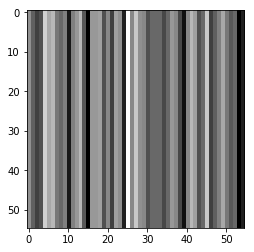

In [13]:
i = 10
j = 10

patch_empty = imageio.imread(all_files_ch3[0])[i * image_size: (i+1) * image_size, j * image_size: (j+1) * image_size]
plt.imshow(patch_empty, cmap='gray')
plt.show()

In [ ]:
for filepath_counter, filepath in enumerate(all_files_ch3):
    
    image = imageio.imread(filepath)
    
    print(filepath_counter + 1, '/', len(all_files_ch3))
    
    filepath_dir = os.path.split(os.path.split(filepath)[0])[1]  # get the directory, e.g. "Anaphase"
    filepath_file = os.path.splitext(os.path.split(filepath)[1])[0]  # get the file name without the extension, e.g. "Ch3_CP0001"
    
    
    for j in range(image.shape[1] // image_size):
        for i in range(image.shape[0] // image_size):
            patch_filename = filepath_file + '_' + str(j).zfill(2) + '_' + str(i).zfill(2) + '.bmp'
            patch_filepath = os.path.join(patches_base_dir, filepath_dir, patch_filename)
            patch = image[i * image_size: (i+1) * image_size, j * image_size: (j+1) * image_size]
            
            # this only works for the first class (the rest need to be manually deleted)
            if (patch == patch_empty).all():
#                 plt.imshow(patch, cmap='gray')
#                 plt.show()
                continue
            
            patch_uint8 = (patch - patch.min()) * ((max_uint8 - min_uint8) / (patch.max() - patch.min())) + min_uint8
            patch_uint8 = np.array(patch_uint8, dtype=np.uint8)
            
            #imageio.imwrite(patch_filepath, patch_uint8)
                        
#             print(patch_filepath)

#             plt.imshow(patch, cmap='gray')
#             plt.show()
            
#             plt.imshow(patch_uint8, cmap='gray')
#             plt.show()
    